# KNN Analysis for Graduate Admission Prediction
This notebook implements K-Nearest Neighbors (KNN) algorithm to predict graduate admission chances based on various academic parameters.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Project_Admission_Predict.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

Dataset Shape: (400, 9)

First few rows:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


None


Descriptive Statistics:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [3]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

Missing Values:
No missing values found


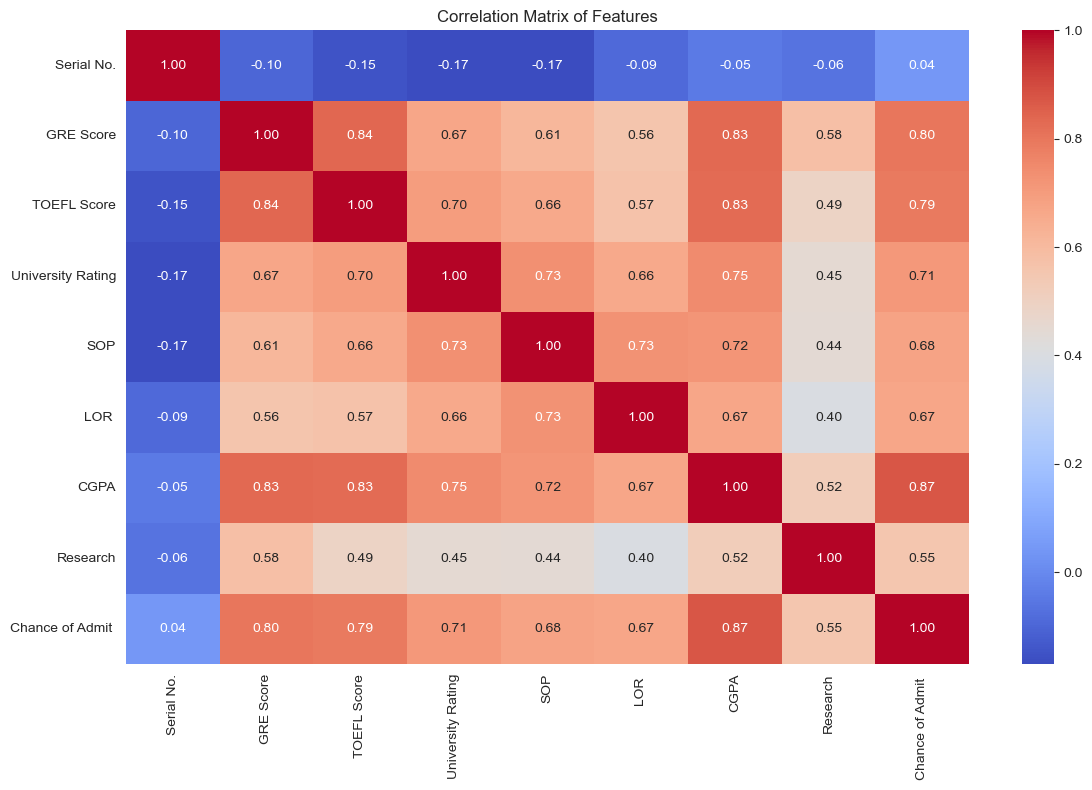

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

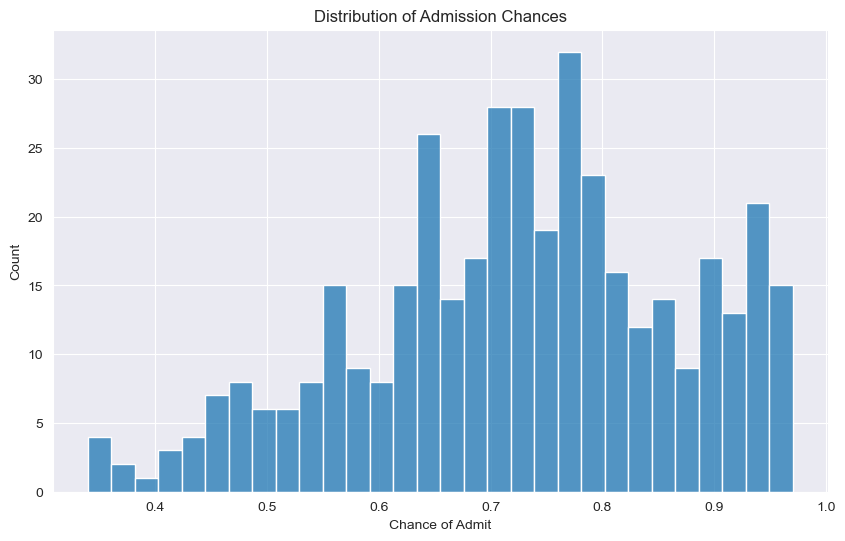

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Chance of Admit ', bins=30)
plt.title('Distribution of Admission Chances')
plt.xlabel('Chance of Admit')
plt.ylabel('Count')
plt.show()

In [6]:
df['Admission_Binary'] = (df['Chance of Admit '] >= 0.8).astype(int)

feature_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df[feature_columns]
y = df['Admission_Binary']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nClass distribution:")
display(y.value_counts(normalize=True))

Features shape: (400, 7)
Target shape: (400,)

Class distribution:


Admission_Binary
0    0.68
1    0.32
Name: proportion, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (320, 7)
Testing set shape: (80, 7)


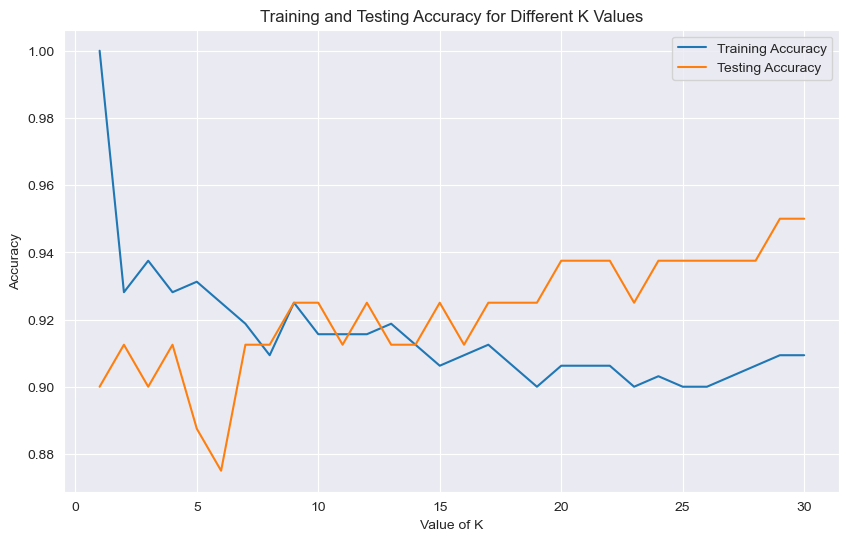

Optimal K value: 29


In [9]:
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Training Accuracy')
plt.plot(k_range, test_scores, label='Testing Accuracy')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different K Values')
plt.legend()
plt.grid(True)
plt.show()

optimal_k = k_range[np.argmax(test_scores)]
print(f"Optimal K value: {optimal_k}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.93      0.93      0.93        29

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



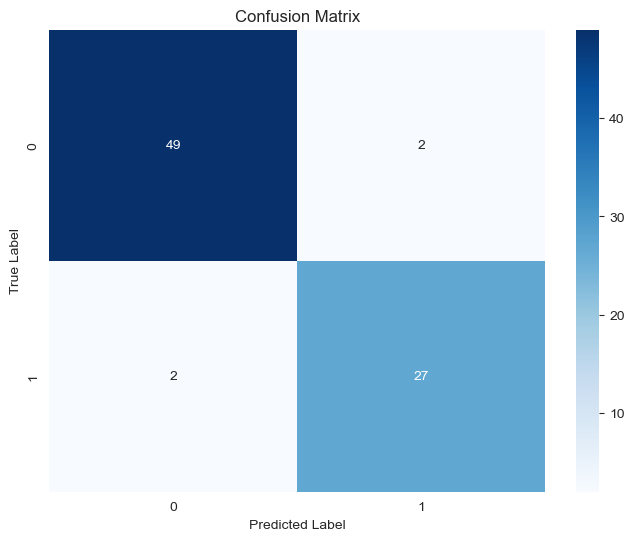

In [12]:
final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

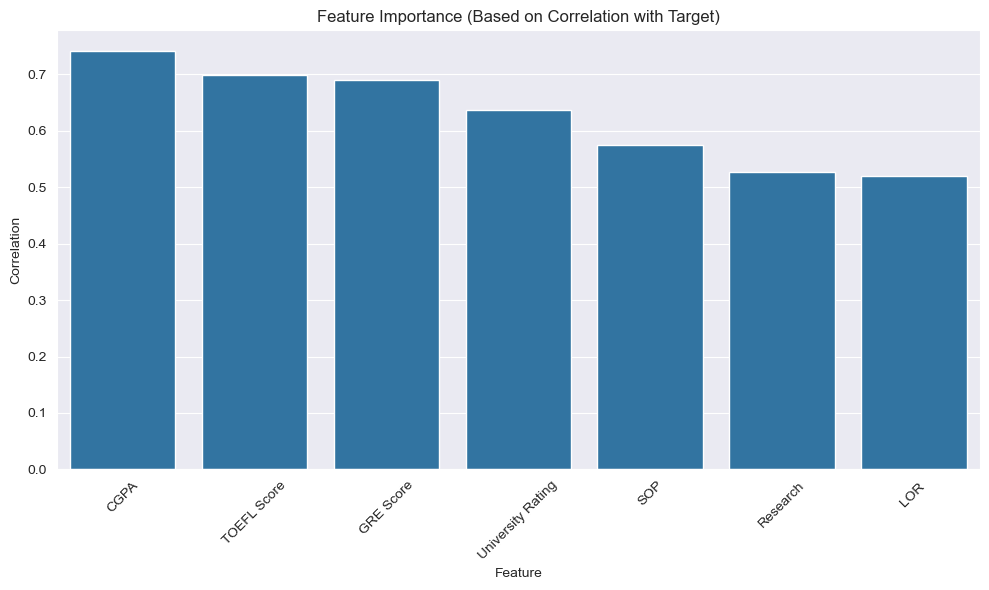

In [13]:
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Correlation': [abs(df[col].corr(df['Admission_Binary'])) for col in feature_columns]
})
feature_importance = feature_importance.sort_values('Correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Feature', y='Correlation')
plt.title('Feature Importance (Based on Correlation with Target)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
def predict_admission(model, scaler, gre, toefl, univ_rating, sop, lor, cgpa, research):
    input_data = np.array([[gre, toefl, univ_rating, sop, lor, cgpa, research]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)
    return prediction[0], probability[0]

example_gre = 320
example_toefl = 110
example_rating = 4
example_sop = 4.5
example_lor = 4.0
example_cgpa = 9.0